In [70]:
# https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_csv('./data/regression/data_1d.csv',header=None,names=['X','Y'])

In [45]:
df.head()

,X,Y
0,95.724162,197.179636
1,35.757619,67.590670
2,28.816847,60.854133
3,99.958481,196.907397
4,66.809748,125.311129


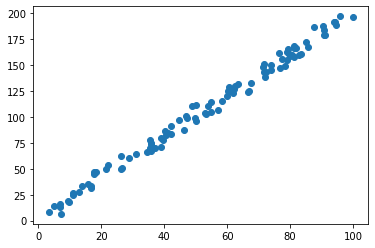

In [46]:
plt.scatter(df.X,df.Y)

## our equation

## $ \hat{y} = {a}{x}_{i} + {b} $

## Sum of squared error

## $ {E} = \sum \limits_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} $

## minimise the error

## $ {E} = \sum \limits_{i=1}^{n}(y_{i} - ({a}{x}_{i} + {b}))^{2} $

## derivative of E wrt a

## $ 
	\frac{\partial E}{\partial a} = \sum \limits_{i=1}^{n}2(y_{i} - {a}{x}_{i} + {b})({-x}) = {0}
$

## $
  -\sum \limits_{i=1}^{n}{y}_{i}{x}_{i} + {a}\sum \limits_{i=1}^{n}{x}_{i}^{2} + {b}\sum \limits_{i=1}^{n}{x}_{i} = 0
$

## derivative of E wrt a

## $
  -\sum \limits_{i=1}^{n}{y}_{i} + {a}\sum \limits_{i=1}^{n}{x}_{i} + {b}\sum \limits_{i=1}^{n}{1} = 0
$

## $
  {a} = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - \bar{x}^2}
$

## $
  {b} = \frac{\bar{y}\bar{x^2} - \bar{x}\bar{xy}}{\bar{x^2} - \bar{x}^2}
$

## code

In [77]:
denominator = df.X.dot(df.X) - df.X.mean()*df.X.sum()
a = (df.X.dot(df.Y) - df.Y.mean()*df.X.sum())/denominator
b = (df.Y.mean()*df.X.dot(df.X) - df.X.mean()*df.X.dot(df.Y))/denominator

In [78]:
Yhat = a*df.X + b

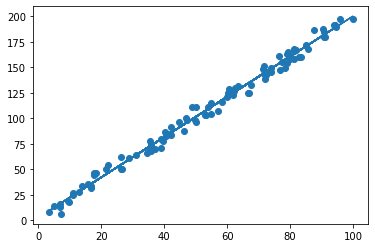

In [79]:
plt.scatter(df.X,df.Y)
plt.plot(df.X,Yhat)


## ${R}^{2}$ 

## $ sum  of  residuals = \sum \limits_{i}^{n}({y}_{i} - \hat{y}_{i})^{2} $

## $ sum  of  total = \sum \limits_{i}^{n}({y}_{i} - \bar{y}_{i})^{2} $

## ${R}^{2} = {1} - \frac{sum  of  residuals}{sum  of  total}$ 

In [81]:
d1 = df.Y - Yhat
d2 = df.Y - df.Y.mean()
r2 = 1 - d1.dot(d1)/d2.dot(d2)

In [82]:
print("R-squared : {0}".format(r2))

R-squared : 0.9911838202977805


# Multiple Linear Regression

## $ \hat{y} = {w}^{T}{x}_{i} + {b} $

## $ \hat{y} = {w}_{0}{x}_{0} + {w}_{1}{x}_{1} + ... + {w}_{D}{x}_{D}  = {w}^{T}{x}_{i}; {x}_{0} = {0} $

### data (N=4, D=3); weights

### $
{X} = \begin{bmatrix}
    {0} & {0} & {1} \\
    {0} & {1} & {0} \\
    {1} & {0} & {0} \\
    {1} & {1} & {0} \\
\end{bmatrix}_{4x3}
$

$
{w} = \begin{bmatrix}
    {1}  \\
    {2}  \\
    {3}  \\
\end{bmatrix}_{3x1}
$

## $ 
{y}_{1} =  {w}^{T}{x}_{1} = \begin{bmatrix}
    {1} & {2} & {3} \\
\end{bmatrix} \begin{bmatrix}
    {0} \\
    {0} \\
    {1} \\
\end{bmatrix} = {3} = {x}^{T}_{1}{w} $

## $ 
{y}_{4x1} =  \begin{bmatrix}
    {3} \\
    {2} \\
    {1} \\
    {3} \\
\end{bmatrix}_{4x1} =  \begin{bmatrix}
    {0} & {0} & {1} \\
    {0} & {1} & {0} \\
    {1} & {0} & {0} \\
    {1} & {1} & {0} \\
\end{bmatrix}_{4x3} \times \begin{bmatrix}
    {1}  \\
    {2}  \\
    {3}  \\
\end{bmatrix}_{3x1}  $

## equation

## $ {E} = \sum \limits_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} = \sum \limits_{i=1}^{n}(y_{i} - {w}^{T}{x}_{i})^{2} $

### take the derivate wrt $ {w}^{T} $

## $ \frac{\partial E}{\partial {w}_{j}}  = ? , {j} = {1} ... {D}$

## $ {w}  = ({x^{T}x})^{-1}{x}^{T}{y}$

## cost function

## code

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [92]:
df = pd.read_csv('./data/regression/data_2d.csv',header=None,names=['X1','X2','Y'])

In [93]:
df.head()

,X1,X2,Y
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


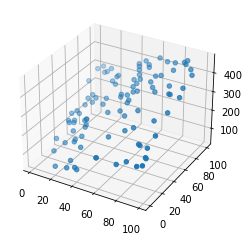

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.X1,df.X2,df.Y)
plt.show()

In [98]:
X = df.drop('Y',axis=1)

In [103]:
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,df.Y))

In [107]:
Yhat = np.dot(X,w)

In [108]:
Yhat

array([318.28237813, 404.5802432 , 182.95461801, 323.02863392,
       324.15265248,  93.73551364, 356.7160788 , 184.08916312,
       421.9198076 , 373.26019445, 421.32505206, 286.94868384,
       393.65403505, 318.50757711, 281.23631054, 300.52083006,
       158.21102727, 446.14124592, 257.05243686, 231.50556017,
       167.91155991,  80.18500495, 462.6056    , 104.09589677,
       361.06256687, 430.44980293, 231.76749226, 284.68642464,
       298.07483556, 309.37124129, 122.61331616, 221.27353081,
       238.03855882, 141.42928738, 390.75857789, 334.47232516,
       456.89480255, 378.6940583 , 235.49429703, 184.34613939,
       122.79018404, 190.99376971, 230.78981581, 380.41606087,
       294.37332407, 306.69057335, 204.44397809, 179.95695401,
       236.90903114, 350.47127094, 350.20886039, 373.74387051,
       243.32838268, 299.6742992 , 147.51848028, 137.79113093,
       312.36843024, 257.11766706, 336.46963125,  68.82374637,
       387.55143786, 300.1555832 , 152.36744375, 392.35

In [109]:
d1 = df.Y - Yhat
d2 = df.Y - df.Y.mean()
r2 = 1 - d1.dot(d1)/d2.dot(d2)

## generalization error

In [112]:
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

In [114]:
def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

In [115]:
def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)

In [116]:
def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain)
    plt.show()

    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)

    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()

In [117]:
def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

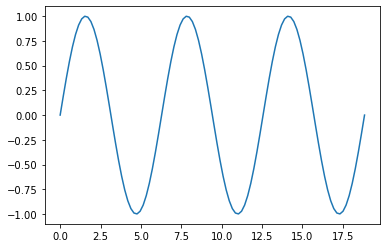

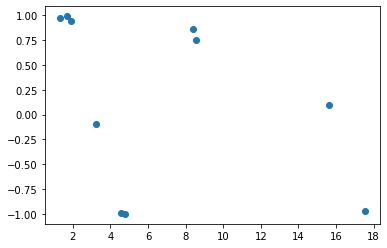

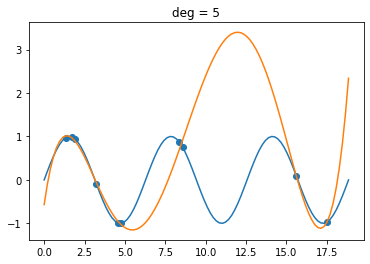

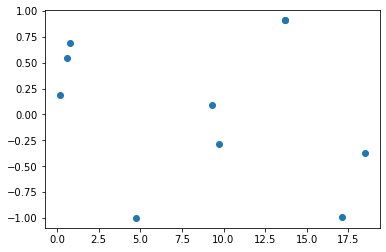

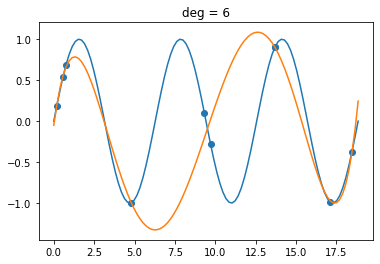

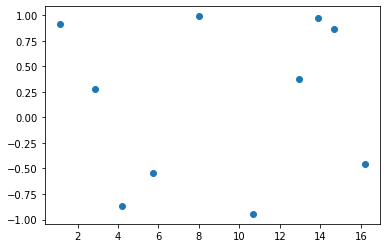

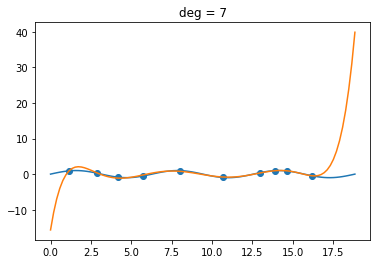

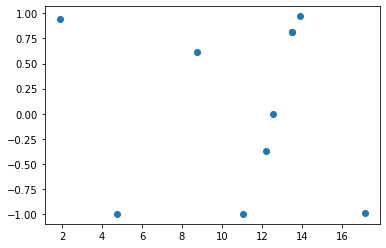

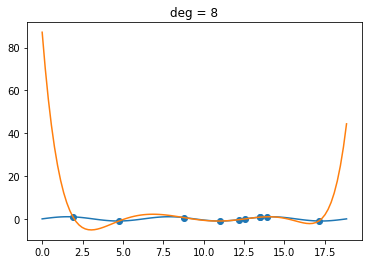

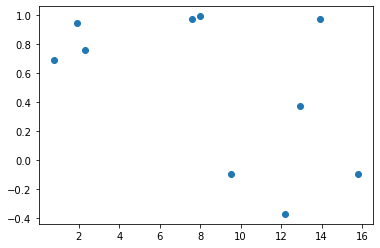

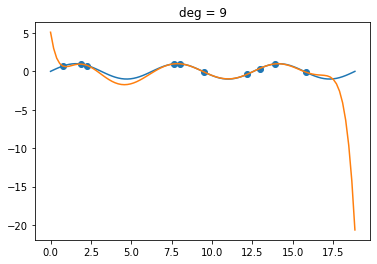

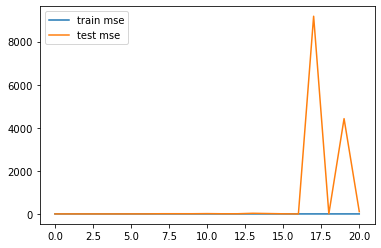

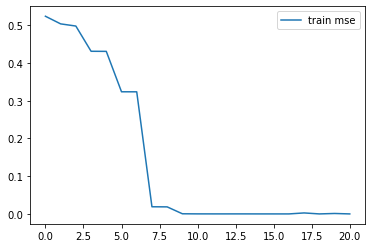

In [118]:
N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

plt.plot(X, Y)
plt.show()

for deg in (5, 6, 7, 8, 9):
    fit_and_display(X, Y, 10, deg)
plot_train_vs_test_curves(X, Y)

## L2 Regularization

## $ {E} = \sum \limits_{i=1}^{n}(y_{i} - \hat{y}_{i} )^{2} + \lambda |w|^{2} ; |w|^{2} = w^{T}w = w_{1}^{2} + w_{2}^{2} + ... + w_{D}^{2}$

In [155]:
df = pd.read_csv('./data/regression/data_1d.csv',header=None,names=['X','Y'])

In [196]:
N = 50
X = np.linspace(0,10,N)
Y = 0.5 * X + np.random.randn(N)
X = np.vstack([np.ones(N),X]).T

Y[-1] += 30
Y[-2] += 30

In [197]:
print(Y.shape)
print(X.shape)

(50,)
(50, 2)


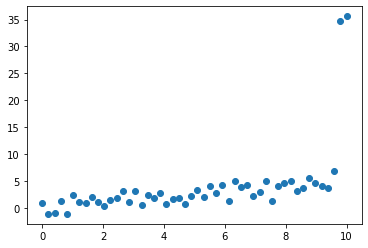

In [198]:
plt.scatter(X[:,1],Y)

In [199]:
w_ml = np.linalg.solve(X.T.dot(X),X.T.dot(Y))

In [200]:
Yhat_ml = X.dot(w_ml)

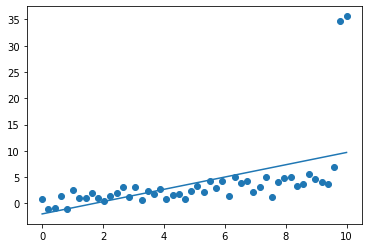

In [203]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],Yhat_ml)
plt.show()

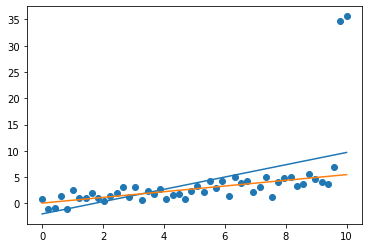

In [204]:
l2 = 1000.0
w_map = np.linalg.solve(l2 * np.eye(2) + X.T.dot(X),X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],Yhat_ml)
plt.plot(X[:,1],Yhat_map)
plt.show()

## L1 Regularization

## $ {E} = \sum \limits_{i=1}^{n}(y_{i} - \hat{y}_{i} )^{2} + \lambda |w|_{1} $

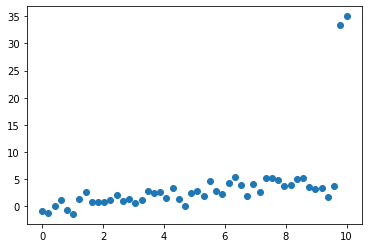

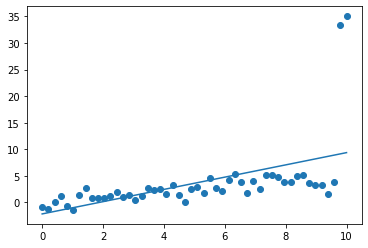

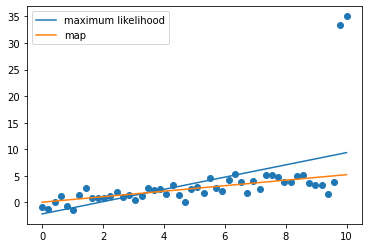

In [206]:
N = 50

# generate the data
X = np.linspace(0,10,N)
Y = 0.5*X + np.random.randn(N)

# make outliers
Y[-1] += 30
Y[-2] += 30

# plot the data
plt.scatter(X, Y)
plt.show()

# add bias term
X = np.vstack([np.ones(N), X]).T

# plot the maximum likelihood solution
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml)
plt.show()

# plot the regularized solution
# probably don't need an L2 regularization this high in many problems
# everything in this example is exaggerated for visualization purposes
l2 = 1000.0
w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml, label='maximum likelihood')
plt.plot(X[:,1], Yhat_map, label='map')
plt.legend()
plt.show()